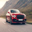

In [11]:
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
model =  tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ciphar10 model.h5")


In [13]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0

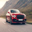

In [14]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/datasets/vehicles_dataset_images/car.jpeg")
img = img.resize((32,32))
img

In [33]:
test = tf.reshape(np.array(img)/255, (-1,32,32,3))

preds = model.predict(test,verbose = False)[0]*100
preds = tf.math.round(preds)
confidence = tf.reduce_max(preds)

index = int(tf.where(preds == confidence)[0][0])
pred = classes[index]
print(pred.title(),int(confidence),"%")

Airplane 12 %
